In [66]:
import re
import os
import io
import shutil
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAvgPool1D, TextVectorization

In [86]:
dataset_dir = "/home/mike/Downloads/archive(18)/dataset.csv"

In [87]:
# batch_size = 32
# seed = 123
# train_ds = tf.keras.utils.text_dataset_from_directory(
#     dataset_dir,
#     batch_size=batch_size,
#     validation_split=0.2,
#     subset="training",
#     seed=seed,
# )
# val_ds = tf.keras.utils.text_dataset_from_directory(
#     dataset_dir,
#     batch_size=batch_size,
#     validation_split=0.2,
#     subset="validation",
#     seed=seed,
# )


In [88]:
data = pd.read_csv(dataset_dir)

In [89]:
data.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


/home/mike/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humor', ylabel='count'>

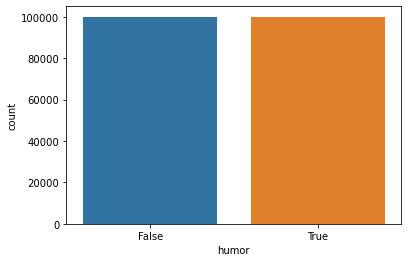

In [91]:
sns.countplot(data['humor'])

<AxesSubplot:ylabel='humor'>

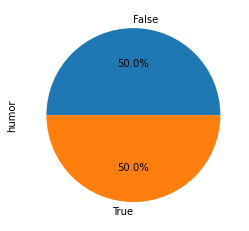

In [92]:
humor_count = data.humor.value_counts()
humor_count.plot(kind='pie',autopct= '%1.1f%%')

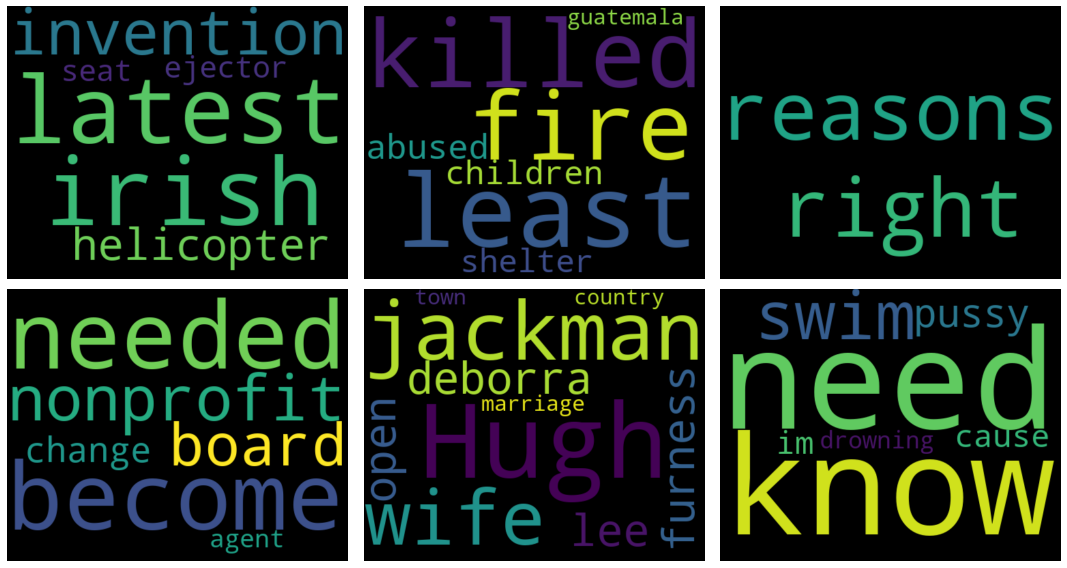

In [93]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  

fig = plt.figure(figsize=(15,8))

for i in range(6):
    plt.subplot(a, b, c)
    text = data.text[np.random.randint(1,len(data))]
    wordcloud = WordCloud(height=400, width=500).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    c = c + 1

plt.tight_layout()
plt.show()

In [94]:
dataset = tf.data.Dataset.from_tensor_slices(dict(data))
dataset

<TensorSliceDataset element_spec={'text': TensorSpec(shape=(), dtype=tf.string, name=None), 'humor': TensorSpec(shape=(), dtype=tf.bool, name=None)}>

In [95]:

for feature_batch in dataset.take(1):
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

  'text'              : b"Joe biden rules out 2020 bid: 'guys, i'm not running'"
  'humor'             : False


In [96]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [102]:
# Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')


# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x,y: x)
vectorize_layer.adapt(dataset)

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.<lambda>() missing 1 required positional argument: 'y'


In [103]:
train_ds[0]

TypeError: 'PrefetchDataset' object is not subscriptable

In [ ]:
for batch in train_ds:
    print(len(batch))

In [52]:
print(len(train_ds))

200000
